### Fire Away
You are an artillery officer under Napoleon Bonaparte - emperor of the French. To coordinate his grand battery he wishes you to develop a technique for targeting the Anglo-Allied forces with great accuracy. Unbeknownst to your commander you are actually in possession of a Mystical Python, capable of solving any problem for you using numerical methods. Employ your knowledge of projectile motion and Python programming to plot cannnon-ball 
trajectories.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Bonaparte_re%C3%A7oit_les_prisonniers_sur_le_champ_de_bataille%2C_1797.jpg/1024px-Bonaparte_re%C3%A7oit_les_prisonniers_sur_le_champ_de_bataille%2C_1797.jpg" width=600px>

Much like the standardization of French guns, in this series of tasks you will slowly extend your initial solution to generalize it to more complicated situations. This 'snowflake' approach is common when dealing with unknown problems. After all, diving head first into the most complicated, but also most general, case is likely going to bog you down with debugging.

#### Task 1: Parabolic Paths
Given $v_0$, gravity $g$ and an initial angle $\theta$. Write a function to plot the trajectory of a cannonball  as:
1. A function of time
2. A function of distance
You can assume your cannon is located at the origin (0,0) in 2D space and that your target is located to the right (positive x-direction). Unfortunately, you cannot fire a cannonball back in time.

**Hint**: Try to work this out analytically using pen-and-paper then translate your solution to a general function one!

**Hint 2**: If you get stuck on the kinematics, check out the Wikipedia Page on [Projectile Motion](https://en.wikipedia.org/wiki/Projectile_motion)

<img src="https://i.imgur.com/NZYmVlJ.png" alt="Basic Canon Ball Trajectory" style="width:50vw">

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

def projection(v0,g,theta):
    theta = math.radians(theta)
    x_velocity = v0 * math.cos(theta)
    y_velocity = v0 * math.sin(theta)
    
    tTotal = (2*v0*np.sin(theta))/g
    R = tTotal * x_velocity # Range
    
    t = np.linspace(0,tTotal,100)
    y = ( v0 * np.sin(theta) ) * t - (0.5)*g*(t**2) 
    plt.figure()
    plt.scatter(t,y,color='black',marker='D')
    plt.xlabel("Time (s)")
    plt.ylabel("Height (m)")
    plt.show()
    
    x = np.linspace(0,R,100)
    y = np.tan(theta)*x - (g/(2*(v0**2)*(np.cos(theta)**2)))*(x**2)
    plt.figure()
    plt.scatter(x,y,color='black',marker='D')
    plt.xlabel("Distance (m)")
    plt.ylabel("Height (m)")
    plt.show()
    
projection(60.0,9.8,30.0)
    

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

#### Task 2: Height Offset
Extend your previous projectile-plotters to account for:
* An elevated starting position ($y_0$)

<img src="https://i.imgur.com/GhV9tuX.png" alt="Canon Ball Trajectory from height" style="width:50vw">

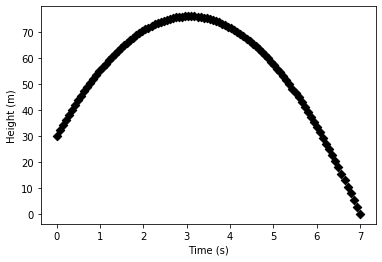

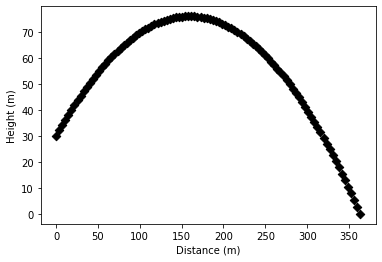

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

def projection2(v0,g,theta, y0, tTotal=None):
    theta = math.radians(theta)
    x_velocity = v0 * math.cos(theta)
    y_velocity = v0 * math.sin(theta)
    
    if tTotal is None: tTotal =  ((v0 * np.sin(theta)) + math.sqrt((v0*np.sin(theta))**2 + 2*g*y0))/g 
    R = tTotal * x_velocity # Range
    
    t = np.linspace(0,tTotal,100)
    y = y0 + ( v0 * np.sin(theta) ) * t - (0.5)*g*(t**2) 
    plt.figure()
    plt.scatter(t,y,color='black',marker='D')
    plt.xlabel("Time (s)")
    plt.ylabel("Height (m)")
    plt.show()
    
    x = np.linspace(0,R,100)
    y = y0 + np.tan(theta)*x - (g/(2*(v0**2)*(np.cos(theta)**2)))*(x**2)
    plt.figure()
    plt.scatter(x,y,color='black',marker='D')
    plt.xlabel("Distance (m)")
    plt.ylabel("Height (m)")
    plt.show()
    
projection2(60.0,9.8,30.0, 30.0)
    

#### Task 3: Aiming Cannon
Find what angle $\theta$ is needed to hit a target at distance $x$ and height $y$, plot the resulting path.

**Hint**: Try to tweak your previous projectile trajectory plotter to work with your calculated angle $\theta$

**Hint 2**: Be careful to make sure your new range in time and distance stops when you reach the target rather than the ground.

<img src="https://i.imgur.com/l8Te5B1.png" alt="Canon Ball Trajectory to specific target" style="width:50vw">

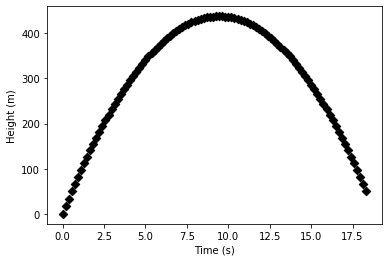

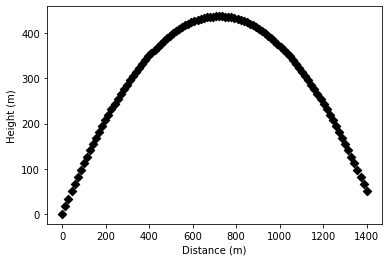

Firing at 50.49 degrees


In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

def static_angle(v0, x, y, g):
    theta = np.arctan((v0**2 + math.sqrt((v0**4) - g*(g*(x**2) + 2*y*(v0**2))))/(g*x))
    projection2(v0,g,math.degrees(theta),0.0, tTotal=(x/(v0*math.cos(theta))))
    
    return math.degrees(theta)
    
print("Firing at {0:.2f} degrees".format(static_angle(120, 1400, 50, 9.8)))
    

#### Task 4: Bring it all together
Find what angle you must fire at from a starting position (x0,y0) to hit a target at (x,y) and plot the resulting trajectory.

<img src="https://i.imgur.com/R6Yka1D.png" alt="Canon Ball Trajectory to specific target" style="width:50vw">

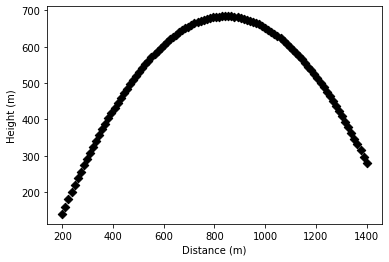

Fire at angle 59.34 to hit target


In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt


# def static_angle(v0, x, y, g):
#     theta = np.arctan((v0**2 + math.sqrt((v0**4) - g*(g*(x**2) + 2*y*(v0**2))))/(g*x))

def mobile_angle(v0, x, y, x0, y0, g):
    try:
        theta = np.arctan((v0**2 + math.sqrt((v0**4) - g*(g*((x-x0)**2) + 2*(y-y0)*(v0**2))))/(g*(x-x0)))
    except ValueError:
        print("Target cannot be reached with current initial velocity, use more gunpowder!")


    x_velocity = v0 * math.cos(theta)
    y_velocity = v0 * math.sin(theta)
    
    tTotal =  (x-x0) / x_velocity # Time of Flight
    R = tTotal * x_velocity # Range
    
    x = np.linspace(x0,x0+R,100)
    y = (y-y0) + np.tan(theta)*(x-x0) - (g/(2*(v0**2)*(np.cos(theta)**2)))*((x-x0)**2) 
    plt.figure()
    plt.scatter(x,y,color='black',marker='D')
    plt.xlabel("Distance (m)")
    plt.ylabel("Height (m)")
    plt.show()
    return math.degrees(theta)

print("Fire at angle {0:.2f} to hit target".format(mobile_angle(120.0,1400.0, 200.0, 200.0, 60.0, 9.8)))